In [176]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split


from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.pipeline import Pipeline
from sklearn.metrics import *

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df_train = pd.read_csv('data/Train.csv')
df_train.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,0.00804,18.516840,1.996377,-1.227395,0.000074,0.000156,-1.231330,0.006507,840209.874619,76.537512,38.634284,-61.736719,22.358167,0.000057,6156.074219,0.000017,0.119095,234.151102,0.000000,76.536426,38.593017,-61.752587,22.363665,0.021080,883.332451,267.017184,840138.461052,74.543393,38.622451,-61.789016,22.379054,-0.000010,0.000000,76.536426,38.593017,-61.752587,22.363665,0.000064,0.566828,NaN,NaN,0.000000,NaN,NaN,NaN,76.536426,38.593017,-61.752587,22.363665,NaN,-1.231330,840209.874619,76.537512,38.634284,-61.736719,22.358167,-0.000127,0.312521,-0.000040,-1.861476,0.000000,76.536426,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,0.00839,22.546533,3.330430,-1.188108,0.000076,0.000197,-1.082553,0.018360,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000055,6156.074219,0.000021,0.115179,233.313706,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.022017,1148.985447,61.216687,841116.763051,-57.015200,61.402626,-74.457583,33.089495,0.000114,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.000171,0.858446,175.019862,99354.162958,0.059358,5.958538,175.072145,99353.672374,-14.708036,59.624912,-67.693509,28.614804,0.315403,-1.082553,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000150,0.433957,0.000050,-1.452612,0.059433,-14.708036,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,0

In [4]:
df_test = pd.read_csv('data/Test.csv')

In [5]:
df_train.columns = df_train.columns.str.lower()

In [6]:
df_test.columns = df_test.columns.str.lower()

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 82 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   place_id x date                                      30557 non-null  object 
 1   date                                                 30557 non-null  object 
 2   place_id                                             30557 non-null  object 
 3   target                                               30557 non-null  float64
 4   target_min                                           30557 non-null  float64
 5   target_max                                           30557 non-null  float64
 6   target_variance                                      30557 non-null  float64
 7   target_count                                         30557 non-null  int64  
 8   precipitable_water_entire_atmosphere                 30557 non-nul

In [8]:
df_train['date'] = pd.to_datetime(df_train['date'])

In [9]:
df_test['date'] = pd.to_datetime(df_test['date'])

/var/folders/0v/n3w11jxs0zxdx0ty34xv_fx40000gn/T/ipykernel_15330/1145112096.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


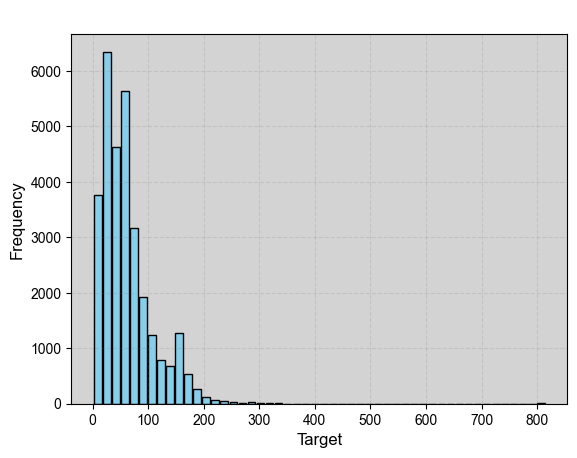

In [10]:
plt.hist(df_train['target'], bins=50, edgecolor='black', color='skyblue', rwidth=0.85)
plt.gca().set_facecolor('lightgray')
plt.style.use('seaborn')
plt.grid(True, linestyle='--', alpha=0.2, color='gray')
plt.title(' ', fontsize=16)
plt.xlabel('Target', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
#plt.savefig('figures/price_psqft_dist.png') 
plt.show()

/var/folders/0v/n3w11jxs0zxdx0ty34xv_fx40000gn/T/ipykernel_15330/2441951723.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


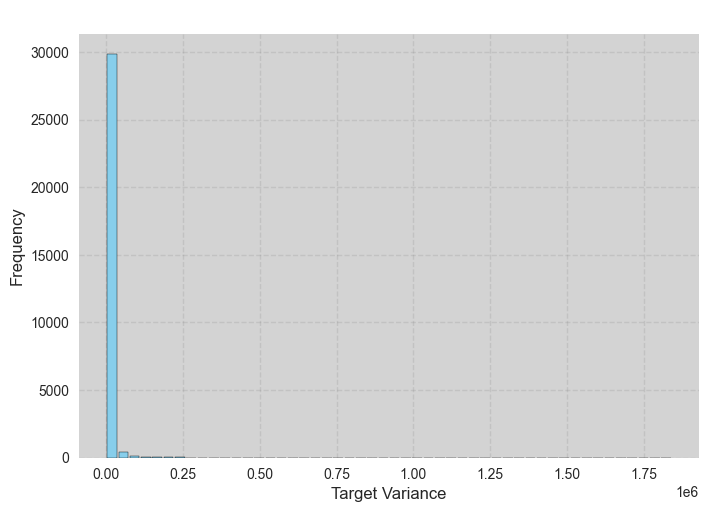

In [11]:
plt.hist(df_train['target_variance'], bins=50, edgecolor='black', color='skyblue', rwidth=0.85)
plt.gca().set_facecolor('lightgray')
plt.style.use('seaborn')
plt.grid(True, linestyle='--', alpha=0.2, color='gray')
plt.title(' ', fontsize=16)
plt.xlabel('Target Variance', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
#plt.savefig('figures/price_psqft_dist.png') 
plt.show()

In [12]:
df_corr = df_train.copy()
df_corr = df_corr.drop(['place_id x date', 'date', 'place_id'], axis=1)

In [13]:
correlation = df_corr.corr()['target']
corr_data = pd.DataFrame(correlation)
print(corr_data.sort_values(by='target', ascending=False).head(20))
print('------------------------------')
print(corr_data.sort_values(by='target', ascending=False).tail(20))


                                                   target
target                                           1.000000
target_min                                       0.818803
target_max                                       0.630801
l3_co_co_column_number_density                   0.375737
l3_hcho_tropospheric_hcho_column_number_density  0.347125
l3_hcho_hcho_slant_column_number_density         0.320849
l3_no2_no2_slant_column_number_density           0.315718
l3_no2_no2_column_number_density                 0.306772
l3_no2_tropospheric_no2_column_number_density    0.295380
target_variance                                  0.184818
l3_so2_absorbing_aerosol_index                   0.152000
l3_cloud_cloud_top_pressure                      0.123855
l3_cloud_cloud_base_pressure                     0.097343
target_count                                     0.094135
l3_ch4_aerosol_optical_depth                     0.086445
l3_ch4_ch4_column_volume_mixing_ratio_dry_air    0.075086
l3_ch4_aerosol

In [14]:
df_train.groupby(['place_id']).size().reset_index(name='Count')

,place_id,Count
0,010Q650,94
1,05EC30X,90
2,0DPWHX8,94
3,0GBXTHY,94
4,0HYPV1N,94
5,0I2XREH,65
6,0KV6RJ1,94
7,0MGEY68,94
8,0O9R6AD,92
9,0PP73FZ,94


In [15]:
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['day'] = df_train['date'].dt.day

df_test['year'] = df_test['date'].dt.year
df_test['month'] = df_test['date'].dt.month
df_test['day'] = df_test['date'].dt.day

In [16]:
df_train['log_target'] = np.log(df_train['target'])


In [17]:
df_train['log_target_min'] = np.log(df_train['target_min'])
df_train['log_target_max'] = np.log(df_train['target_max'])

/var/folders/0v/n3w11jxs0zxdx0ty34xv_fx40000gn/T/ipykernel_15330/94072448.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


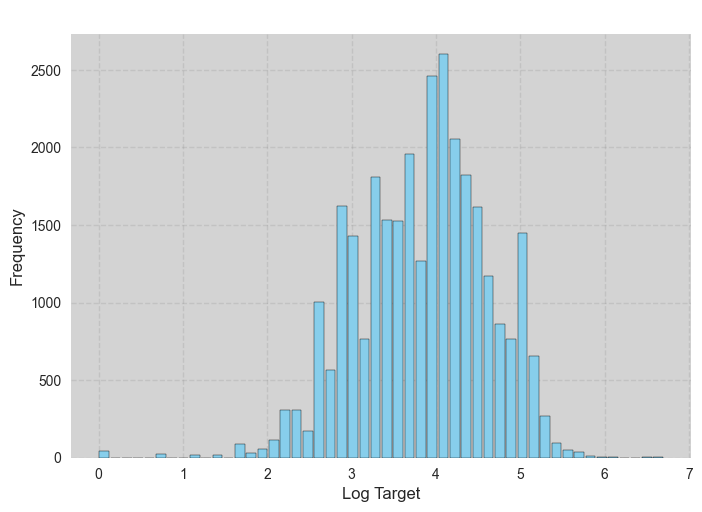

In [18]:
plt.hist(df_train['log_target'], bins=50, edgecolor='black', color='skyblue', rwidth=0.85)
plt.gca().set_facecolor('lightgray')
plt.style.use('seaborn')
plt.grid(True, linestyle='--', alpha=0.2, color='gray')
plt.title(' ', fontsize=16)
plt.xlabel('Log Target', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
#plt.savefig('figures/price_psqft_dist.png') 
plt.show()

/var/folders/0v/n3w11jxs0zxdx0ty34xv_fx40000gn/T/ipykernel_15330/170671060.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


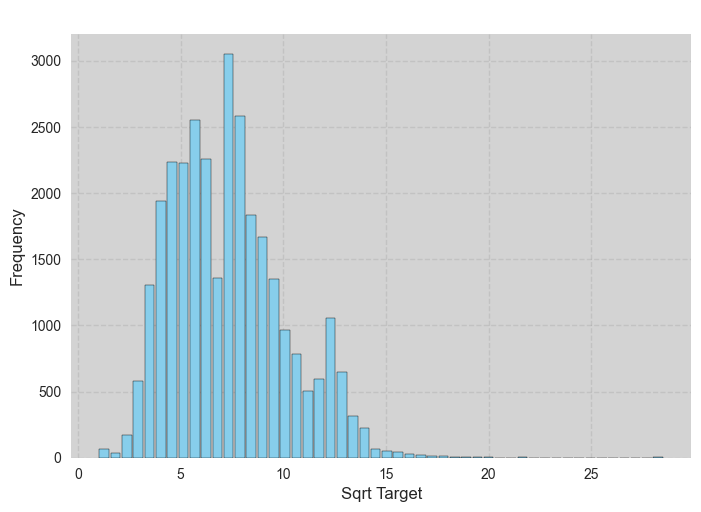

In [19]:
df_train['sqrt_target'] = np.sqrt(df_train['target'])

plt.hist(df_train['sqrt_target'], bins=50, edgecolor='black', color='skyblue', rwidth=0.85)
plt.gca().set_facecolor('lightgray')
plt.style.use('seaborn')
plt.grid(True, linestyle='--', alpha=0.2, color='gray')
plt.title(' ', fontsize=16)
plt.xlabel('Sqrt Target', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
#plt.savefig('figures/price_psqft_dist.png') 
plt.show()

In [20]:
#sns.histplot(x='target_max', y='target_min', data=df_train ,hue='target')
df_train['target'].unique()

array([ 38. ,  39. ,  24. ,  49. ,  21. ,  28. ,  18. ,  31. ,  25. ,
        29. ,  23. ,  40. ,  52. ,  60. ,  46. ,  53. ,  54. ,  34. ,
        45. ,  27. ,  15. ,  41. ,  42. ,  47. ,  22. ,  13. ,  50. ,
        57. ,  51. ,  16. ,  48. ,  44. ,  30. ,  36. ,  59. ,  32. ,
        20. ,  33. ,  43. ,  19. ,  58. ,  61. ,  72. ,  80. ,  17. ,
        55. ,  65. ,  70. ,  76. ,  73. , 117. , 128. , 119. , 101. ,
       115. ,  67. , 124. ,  75. , 131. , 157. , 138. , 161. , 152. ,
        66. ,  62. ,  83. ,  96. ,  81. ,  90. ,  95. ,  84. ,  78. ,
       130. ,  56. ,  93. ,  89. , 139. , 126. , 114. ,  88. , 112. ,
        91. ,  68. , 107. ,  98. ,  77. , 123. , 120. ,  82. ,  64. ,
        92. ,   8. ,  11. ,  10. ,  12. ,  37. ,  14. ,   9. ,  26. ,
         7. ,  87. ,  85. , 104. , 129. , 142. , 151. , 137. , 127. ,
        74. ,  97. , 149. , 109. ,  63. , 147. , 134. , 159. , 162. ,
        69. ,   5. ,   3. ,   2. ,  71. , 102. , 122. ,  99. , 132. ,
       158. , 164. ,

/var/folders/0v/n3w11jxs0zxdx0ty34xv_fx40000gn/T/ipykernel_15330/3242716794.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


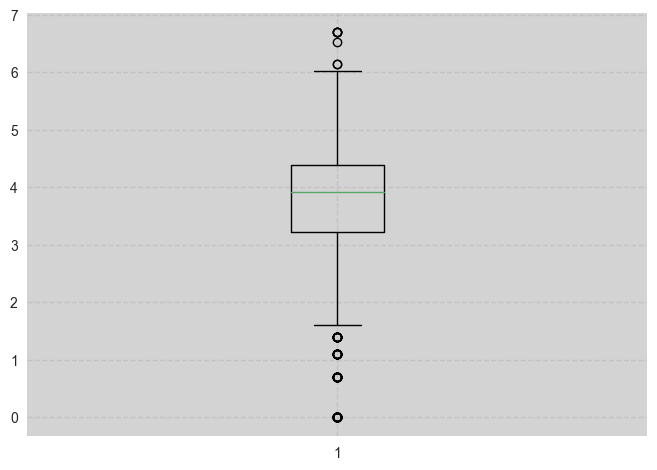

In [21]:
plt.boxplot(df_train['log_target'])
plt.gca().set_facecolor('lightgray')
plt.style.use('seaborn')
plt.grid(True, linestyle='--', alpha=0.2, color='gray')

plt.show()

In [22]:
#Null values percentages in columns 

null_count = df_train.isnull().sum()
total_rows = len(df_train)
null_percentage = (null_count / total_rows) * 100
null_info_df = pd.DataFrame({'Null Percentage': null_percentage})
null_info_df.reset_index(inplace=True)
print(null_info_df)

                                                index  Null Percentage
0                                     place_id x date         0.000000
1                                                date         0.000000
2                                            place_id         0.000000
3                                              target         0.000000
4                                          target_min         0.000000
5                                          target_max         0.000000
6                                     target_variance         0.000000
7                                        target_count         0.000000
8                precipitable_water_entire_atmosphere         0.000000
9                   relative_humidity_2m_above_ground         0.000000
10                  specific_humidity_2m_above_ground         0.000000
11                        temperature_2m_above_ground         0.000000
12               u_component_of_wind_10m_above_ground         0.000000
13    

In [23]:
df_drop_train = df_train.drop(['place_id x date'], axis=1)

df_drop_test = df_test.drop(['place_id x date'], axis=1)

In [24]:
# Get the features list with null values 
columns_with_nan_train = df_train.columns[df_train.isnull().any()].tolist()

print(columns_with_nan_train)

['l3_no2_no2_column_number_density', 'l3_no2_no2_slant_column_number_density', 'l3_no2_absorbing_aerosol_index', 'l3_no2_cloud_fraction', 'l3_no2_sensor_altitude', 'l3_no2_sensor_azimuth_angle', 'l3_no2_sensor_zenith_angle', 'l3_no2_solar_azimuth_angle', 'l3_no2_solar_zenith_angle', 'l3_no2_stratospheric_no2_column_number_density', 'l3_no2_tropopause_pressure', 'l3_no2_tropospheric_no2_column_number_density', 'l3_o3_o3_column_number_density', 'l3_o3_o3_effective_temperature', 'l3_o3_cloud_fraction', 'l3_o3_sensor_azimuth_angle', 'l3_o3_sensor_zenith_angle', 'l3_o3_solar_azimuth_angle', 'l3_o3_solar_zenith_angle', 'l3_co_co_column_number_density', 'l3_co_h2o_column_number_density', 'l3_co_cloud_height', 'l3_co_sensor_altitude', 'l3_co_sensor_azimuth_angle', 'l3_co_sensor_zenith_angle', 'l3_co_solar_azimuth_angle', 'l3_co_solar_zenith_angle', 'l3_hcho_hcho_slant_column_number_density', 'l3_hcho_cloud_fraction', 'l3_hcho_sensor_azimuth_angle', 'l3_hcho_sensor_zenith_angle', 'l3_hcho_solar

In [25]:
# Inputing with place_id and month average

averages = df_drop_train.groupby(['place_id', 'month']).mean()

# Iterate over the columns with missing values
for col in columns_with_nan_train:
    # Fill missing values with the calculated averages
    df_drop_train[col] = df_drop_train.apply(lambda row: averages.loc[(row['place_id'], row['month']), col] if pd.isna(row[col]) else row[col], axis=1)

In [26]:
#Null values percentages in columns after inputing with place_id and month average

null_count = df_drop_train.isnull().sum()
total_rows = len(df_drop_train)
null_percentage = (null_count / total_rows) * 100
null_info_df = pd.DataFrame({'Null Percentage': null_percentage})
null_info_df.reset_index(inplace=True)
print(null_info_df)

                                                index  Null Percentage
0                                                date         0.000000
1                                            place_id         0.000000
2                                              target         0.000000
3                                          target_min         0.000000
4                                          target_max         0.000000
5                                     target_variance         0.000000
6                                        target_count         0.000000
7                precipitable_water_entire_atmosphere         0.000000
8                   relative_humidity_2m_above_ground         0.000000
9                   specific_humidity_2m_above_ground         0.000000
10                        temperature_2m_above_ground         0.000000
11               u_component_of_wind_10m_above_ground         0.000000
12               v_component_of_wind_10m_above_ground         0.000000
13    

In [27]:
# Get the features list with null values 

columns_with_nan_train_2 = df_drop_train.columns[df_drop_train.isnull().any()].tolist()

print(columns_with_nan_train_2)

['l3_no2_no2_column_number_density', 'l3_no2_no2_slant_column_number_density', 'l3_no2_absorbing_aerosol_index', 'l3_no2_cloud_fraction', 'l3_no2_sensor_altitude', 'l3_no2_sensor_azimuth_angle', 'l3_no2_sensor_zenith_angle', 'l3_no2_solar_azimuth_angle', 'l3_no2_solar_zenith_angle', 'l3_no2_stratospheric_no2_column_number_density', 'l3_no2_tropopause_pressure', 'l3_no2_tropospheric_no2_column_number_density', 'l3_o3_o3_column_number_density', 'l3_o3_o3_effective_temperature', 'l3_o3_cloud_fraction', 'l3_o3_sensor_azimuth_angle', 'l3_o3_sensor_zenith_angle', 'l3_o3_solar_azimuth_angle', 'l3_o3_solar_zenith_angle', 'l3_co_co_column_number_density', 'l3_co_h2o_column_number_density', 'l3_co_cloud_height', 'l3_co_sensor_altitude', 'l3_co_sensor_azimuth_angle', 'l3_co_sensor_zenith_angle', 'l3_co_solar_azimuth_angle', 'l3_co_solar_zenith_angle', 'l3_hcho_hcho_slant_column_number_density', 'l3_hcho_cloud_fraction', 'l3_hcho_sensor_azimuth_angle', 'l3_hcho_sensor_zenith_angle', 'l3_hcho_solar

In [28]:
# Inputing with place_id average
averages = df_drop_train.groupby(['place_id']).mean()

# Iterate over the columns with missing values
for col in columns_with_nan_train_2:
    # Fill missing values with the calculated averages
    df_drop_train[col] = df_drop_train.apply(lambda row: averages.loc[(row['place_id']), col] if pd.isna(row[col]) else row[col], axis=1)

In [29]:
#Null values percentages in columns after inputing with place_id average
null_count = df_drop_train.isnull().sum()
total_rows = len(df_drop_train)
null_percentage = (null_count / total_rows) * 100
null_info_df = pd.DataFrame({'Null Percentage': null_percentage})
null_info_df.reset_index(inplace=True)
print(null_info_df)

                                                index  Null Percentage
0                                                date         0.000000
1                                            place_id         0.000000
2                                              target         0.000000
3                                          target_min         0.000000
4                                          target_max         0.000000
5                                     target_variance         0.000000
6                                        target_count         0.000000
7                precipitable_water_entire_atmosphere         0.000000
8                   relative_humidity_2m_above_ground         0.000000
9                   specific_humidity_2m_above_ground         0.000000
10                        temperature_2m_above_ground         0.000000
11               u_component_of_wind_10m_above_ground         0.000000
12               v_component_of_wind_10m_above_ground         0.000000
13    

In [30]:
# Remain null data was 0.0091% thats dropped (3 rows)
df_drop_train = df_drop_train.dropna()

In [31]:
#Null values percentages in columns after inputing with place_id average
null_count = df_drop_train.isnull().sum()
total_rows = len(df_drop_train)
null_percentage = (null_count / total_rows) * 100
null_info_df = pd.DataFrame({'Null Percentage': null_percentage})
null_info_df.reset_index(inplace=True)
print(null_info_df)

                                                index  Null Percentage
0                                                date              0.0
1                                            place_id              0.0
2                                              target              0.0
3                                          target_min              0.0
4                                          target_max              0.0
5                                     target_variance              0.0
6                                        target_count              0.0
7                precipitable_water_entire_atmosphere              0.0
8                   relative_humidity_2m_above_ground              0.0
9                   specific_humidity_2m_above_ground              0.0
10                        temperature_2m_above_ground              0.0
11               u_component_of_wind_10m_above_ground              0.0
12               v_component_of_wind_10m_above_ground              0.0
13    

In [32]:
# Get the features list with null values 

columns_with_nan_test = df_test.columns[df_test.isnull().any()].tolist()

print(columns_with_nan_test)


['l3_no2_no2_column_number_density', 'l3_no2_no2_slant_column_number_density', 'l3_no2_absorbing_aerosol_index', 'l3_no2_cloud_fraction', 'l3_no2_sensor_altitude', 'l3_no2_sensor_azimuth_angle', 'l3_no2_sensor_zenith_angle', 'l3_no2_solar_azimuth_angle', 'l3_no2_solar_zenith_angle', 'l3_no2_stratospheric_no2_column_number_density', 'l3_no2_tropopause_pressure', 'l3_no2_tropospheric_no2_column_number_density', 'l3_o3_o3_column_number_density', 'l3_o3_o3_effective_temperature', 'l3_o3_cloud_fraction', 'l3_o3_sensor_azimuth_angle', 'l3_o3_sensor_zenith_angle', 'l3_o3_solar_azimuth_angle', 'l3_o3_solar_zenith_angle', 'l3_co_co_column_number_density', 'l3_co_h2o_column_number_density', 'l3_co_cloud_height', 'l3_co_sensor_altitude', 'l3_co_sensor_azimuth_angle', 'l3_co_sensor_zenith_angle', 'l3_co_solar_azimuth_angle', 'l3_co_solar_zenith_angle', 'l3_hcho_hcho_slant_column_number_density', 'l3_hcho_cloud_fraction', 'l3_hcho_sensor_azimuth_angle', 'l3_hcho_sensor_zenith_angle', 'l3_hcho_solar

In [33]:
# Inputing with place_id and month average

averages = df_drop_test.groupby(['place_id', 'month']).mean()

# Iterate over the columns with missing values
for col in columns_with_nan_test:
    # Fill missing values with the calculated averages
    df_drop_test[col] = df_drop_test.apply(lambda row: averages.loc[(row['place_id'], row['month']), col] if pd.isna(row[col]) else row[col], axis=1)

In [34]:
#Null values percentages in columns after inputing with place_id and month average
null_count = df_drop_test.isnull().sum()
total_rows = len(df_drop_test)
null_percentage = (null_count / total_rows) * 100
null_info_df = pd.DataFrame({'Null Percentage': null_percentage})
null_info_df.reset_index(inplace=True)
print(null_info_df)

                                                index  Null Percentage
0                                                date         0.000000
1                                            place_id         0.000000
2                precipitable_water_entire_atmosphere         0.000000
3                   relative_humidity_2m_above_ground         0.000000
4                   specific_humidity_2m_above_ground         0.000000
5                         temperature_2m_above_ground         0.000000
6                u_component_of_wind_10m_above_ground         0.000000
7                v_component_of_wind_10m_above_ground         0.000000
8                    l3_no2_no2_column_number_density         0.185920
9              l3_no2_no2_slant_column_number_density         0.185920
10                     l3_no2_absorbing_aerosol_index         0.185920
11                              l3_no2_cloud_fraction         0.185920
12                             l3_no2_sensor_altitude         0.185920
13    

In [35]:
# Get the features list with null values 
columns_with_nan_test_2 = df_test.columns[df_test.isnull().any()].tolist()

print(columns_with_nan_test_2)

['l3_no2_no2_column_number_density', 'l3_no2_no2_slant_column_number_density', 'l3_no2_absorbing_aerosol_index', 'l3_no2_cloud_fraction', 'l3_no2_sensor_altitude', 'l3_no2_sensor_azimuth_angle', 'l3_no2_sensor_zenith_angle', 'l3_no2_solar_azimuth_angle', 'l3_no2_solar_zenith_angle', 'l3_no2_stratospheric_no2_column_number_density', 'l3_no2_tropopause_pressure', 'l3_no2_tropospheric_no2_column_number_density', 'l3_o3_o3_column_number_density', 'l3_o3_o3_effective_temperature', 'l3_o3_cloud_fraction', 'l3_o3_sensor_azimuth_angle', 'l3_o3_sensor_zenith_angle', 'l3_o3_solar_azimuth_angle', 'l3_o3_solar_zenith_angle', 'l3_co_co_column_number_density', 'l3_co_h2o_column_number_density', 'l3_co_cloud_height', 'l3_co_sensor_altitude', 'l3_co_sensor_azimuth_angle', 'l3_co_sensor_zenith_angle', 'l3_co_solar_azimuth_angle', 'l3_co_solar_zenith_angle', 'l3_hcho_hcho_slant_column_number_density', 'l3_hcho_cloud_fraction', 'l3_hcho_sensor_azimuth_angle', 'l3_hcho_sensor_zenith_angle', 'l3_hcho_solar

In [36]:
# Inputing with place_id average

averages = df_drop_test.groupby(['place_id']).mean()

# Iterate over the columns with missing values
for col in columns_with_nan_test_2:
    # Fill missing values with the calculated averages
    df_drop_test[col] = df_drop_test.apply(lambda row: averages.loc[(row['place_id']), col] if pd.isna(row[col]) else row[col], axis=1)

In [37]:
#Null values percentages in columns after inputing with place_id average

null_count = df_drop_test.isnull().sum()
total_rows = len(df_drop_test)
null_percentage = (null_count / total_rows) * 100
null_info_df = pd.DataFrame({'Null Percentage': null_percentage})
null_info_df.reset_index(inplace=True)
print(null_info_df)

                                                index  Null Percentage
0                                                date              0.0
1                                            place_id              0.0
2                precipitable_water_entire_atmosphere              0.0
3                   relative_humidity_2m_above_ground              0.0
4                   specific_humidity_2m_above_ground              0.0
5                         temperature_2m_above_ground              0.0
6                u_component_of_wind_10m_above_ground              0.0
7                v_component_of_wind_10m_above_ground              0.0
8                    l3_no2_no2_column_number_density              0.0
9              l3_no2_no2_slant_column_number_density              0.0
10                     l3_no2_absorbing_aerosol_index              0.0
11                              l3_no2_cloud_fraction              0.0
12                             l3_no2_sensor_altitude              0.0
13    

In [38]:
df_drop_train.columns

Index(['date', 'place_id', 'target', 'target_min', 'target_max',
       'target_variance', 'target_count',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'l3_no2_no2_column_number_density',
       'l3_no2_no2_slant_column_number_density',
       'l3_no2_absorbing_aerosol_index', 'l3_no2_cloud_fraction',
       'l3_no2_sensor_altitude', 'l3_no2_sensor_azimuth_angle',
       'l3_no2_sensor_zenith_angle', 'l3_no2_solar_azimuth_angle',
       'l3_no2_solar_zenith_angle',
       'l3_no2_stratospheric_no2_column_number_density',
       'l3_no2_tropopause_pressure',
       'l3_no2_tropospheric_no2_column_number_density',
       'l3_o3_o3_column_number_density', 'l3_o3_o3_effective_temperature',
       'l3_o3_cloud_fraction', 'l3_o3_sensor_azimuth_angle',
       'l3_o3_sensor_z

## Define Feature and Target, Train,Test Split

In [50]:
# Define target and features 

y = df_drop_train['log_target']
X= df_drop_train.drop(['date','target', 'target_min', 'target_max','target_variance', 'target_count','log_target', 'log_target_min', 'log_target_max','sqrt_target','year'],axis=1)


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [52]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21387, 77), (9167, 77), (21387,), (9167,))

In [56]:
X_train['place_id'].nunique()

339

In [57]:
# Create dummy variables for specific columns in the training set
X_train = pd.get_dummies(X_train, columns=['place_id','month','day'])

# Create dummy variables for the same columns in the testing set
X_test = pd.get_dummies(X_test, columns=['place_id','month','day'])


In [90]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21387, 448), (9167, 448), (21387,), (9167,))

## Linear Regression

In [59]:
lin_reg = LinearRegression()

In [61]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [62]:
y_pred = lin_reg.predict(X_test)

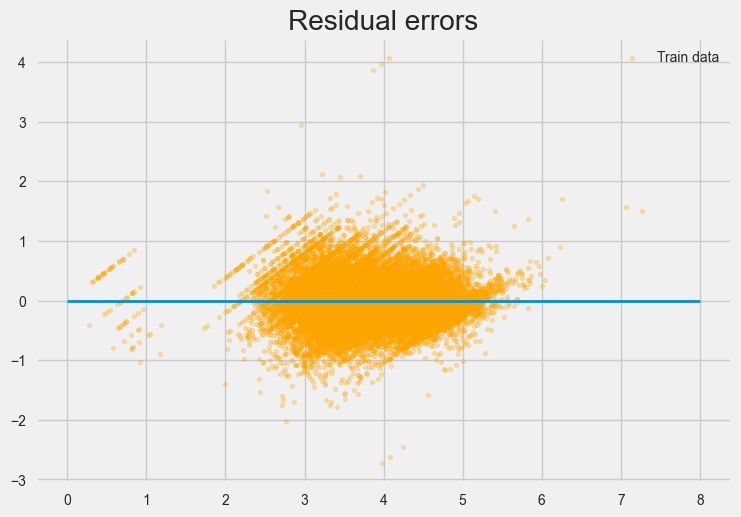

In [100]:
plt.style.use('fivethirtyeight')
 
# plotting residual errors in training data
plt.scatter(lin_reg.predict(X_train),
            lin_reg.predict(X_train) - y_train,
            color="orange", s=10,
            label='Train data',alpha=0.3)
 
# plotting residual errors in test data
#plt.scatter(y_pred,
            #y_pred - y_test,
            #color="blue", s=10,
            #label='Test data',alpha=0.5)
 
# plotting line for zero residual error
plt.hlines(y=0, xmin=0, xmax=8, linewidth=2)
 
# plotting legend
plt.legend(loc='upper right')
 
# plot title
plt.title("Residual errors")
 
# method call for showing the plot
plt.show()

In [129]:
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.3f}")
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.3f}")
r_2 = r2_score(y_test, y_pred)
print(f"R^2: {r_2:.3f}")

p = X_train.shape[1]
n = len(y_test)  # Number of samples
adjusted_r2 = 1 - (1 - r_2) * (n - 1) / (n - p - 1)
print(f"Adjusted R^2: {adjusted_r2:.3f}")

MSE: 0.167
RMSE: 0.409
R^2: 0.725
Adjusted R^2: 0.711


## Lasso Regression

In [77]:
lasso = Lasso(alpha=0.5, max_iter=int(10e5))
lasso.fit(X_train,y_train)

Lasso(alpha=0.5, max_iter=1000000)

In [78]:
y_pred_lasso = lasso.predict(X_test)

In [128]:
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"MSE: {mse_lasso:.3f}")
rmse_lasso = np.sqrt(mse_lasso)
print(f"RMSE: {rmse_lasso:.3f}")
r_2 = r2_score(y_test, y_pred_lasso)
print(f"R^2: {r_2:.3f}")

p = X_train.shape[1]
n = len(y_test)  # Number of samples
adjusted_r2_lasso = 1 - (1 - r_2) * (n - 1) / (n - p - 1)
print(f"Adjusted R^2: {adjusted_r2_lasso:.3f}")

MSE: 0.488
RMSE: 0.699
R^2: 0.199
Adjusted R^2: 0.158


In [91]:
coefficients_1 = lasso.coef_
# Create a list of selected variables based on non-zero coefficients
selected_variables_1 = [var for coef, var in zip(coefficients_1, X_train.columns) if coef != 0]

# Print the selected variables in Model 1
print("Selected Variables in Model 1:", selected_variables_1)

#Print number of features Lasso uses
def coeff_info(model, total_features):
    coeff_used = np.sum(model.coef_ != 0)
    print('The model is using', coeff_used, 'out of', total_features, 'features.')
    print("The highest coefficient has a value of:", max(model.coef_.round(3)))
    
coeff_info(lasso, total_features=X_train.shape[1])

Selected Variables in Model 1: ['relative_humidity_2m_above_ground', 'temperature_2m_above_ground', 'l3_no2_sensor_altitude', 'l3_no2_tropopause_pressure', 'l3_co_h2o_column_number_density', 'l3_co_cloud_height', 'l3_co_sensor_altitude', 'l3_co_solar_azimuth_angle', 'l3_cloud_cloud_base_height', 'l3_cloud_cloud_base_pressure', 'l3_cloud_cloud_optical_depth', 'l3_cloud_cloud_top_height', 'l3_cloud_cloud_top_pressure', 'l3_cloud_solar_azimuth_angle', 'l3_aer_ai_sensor_altitude', 'l3_aer_ai_sensor_azimuth_angle', 'l3_so2_sensor_azimuth_angle', 'l3_so2_solar_azimuth_angle', 'l3_ch4_ch4_column_volume_mixing_ratio_dry_air', 'l3_ch4_aerosol_height']
The model is using 20 out of 448 features.
The highest coefficient has a value of: 0.001


## Ridge Regression

In [93]:
alpha = 1.0  # Regularization strength (hyperparameter); you can adjust this value

ridge_model = Ridge(alpha=alpha)

ridge_model.fit(X_train, y_train)

Ridge()

In [95]:
y_pred_ridge = ridge_model.predict(X_test)

In [127]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"MSE: {mse_ridge:.3f}")
rmse_ridge = np.sqrt(mse_ridge)
print(f"RMSE: {rmse_ridge:.3f}")
r_2 = r2_score(y_test, y_pred_ridge)
print(f"R^2: {r_2:.3f}")

p = X_train.shape[1]
n = len(y_test)  # Number of samples
adjusted_r2_ridge = 1 - (1 - r_2) * (n - 1) / (n - p - 1)
print(f"Adjusted R^2: {adjusted_r2_ridge:.3f}")

MSE: 0.176
RMSE: 0.420
R^2: 0.711
Adjusted R^2: 0.697


## Random Forest Regressor

In [109]:
random_regr = RandomForestRegressor(n_estimators=1000, max_depth=4,min_samples_leaf=20 ,max_samples=0.2 ,random_state=42, n_jobs=-1)

random_regr.fit(X_train,y_train)

RandomForestRegressor(max_depth=4, max_samples=0.2, min_samples_leaf=20,
                      n_estimators=1000, n_jobs=-1, random_state=42)

In [110]:
y_pred_randfor = random_regr.predict(X_test)

In [126]:
mse_randfor = mean_squared_error(y_test, y_pred_randfor)
print(f"MSE: {mse_randfor:.3f}")
rmse_randfor = np.sqrt(mse_randfor)
print(f"RMSE: {rmse_ridge:.3f}")
r_2 = r2_score(y_test, y_pred_randfor)
print(f"R^2: {r_2:.3f}")

p = X_train.shape[1]
n = len(y_test)  # Number of samples
adjusted_r2_randfor = 1 - (1 - r_2) * (n - 1) / (n - p - 1)
print(f"Adjusted R^2: {adjusted_r2_randfor:.3f}")

MSE: 0.383
RMSE: 0.420
R^2: 0.371
Adjusted R^2: 0.339


## Extra Tree Regressor

In [122]:
extra_tree = ExtraTreesRegressor(n_estimators=500, random_state=42)
extra_tree.fit(X_train, y_train)

extra_tree.score(X_test, y_test)

0.7629775543573087

In [123]:
y_pred_extree = extra_tree.predict(X_test)

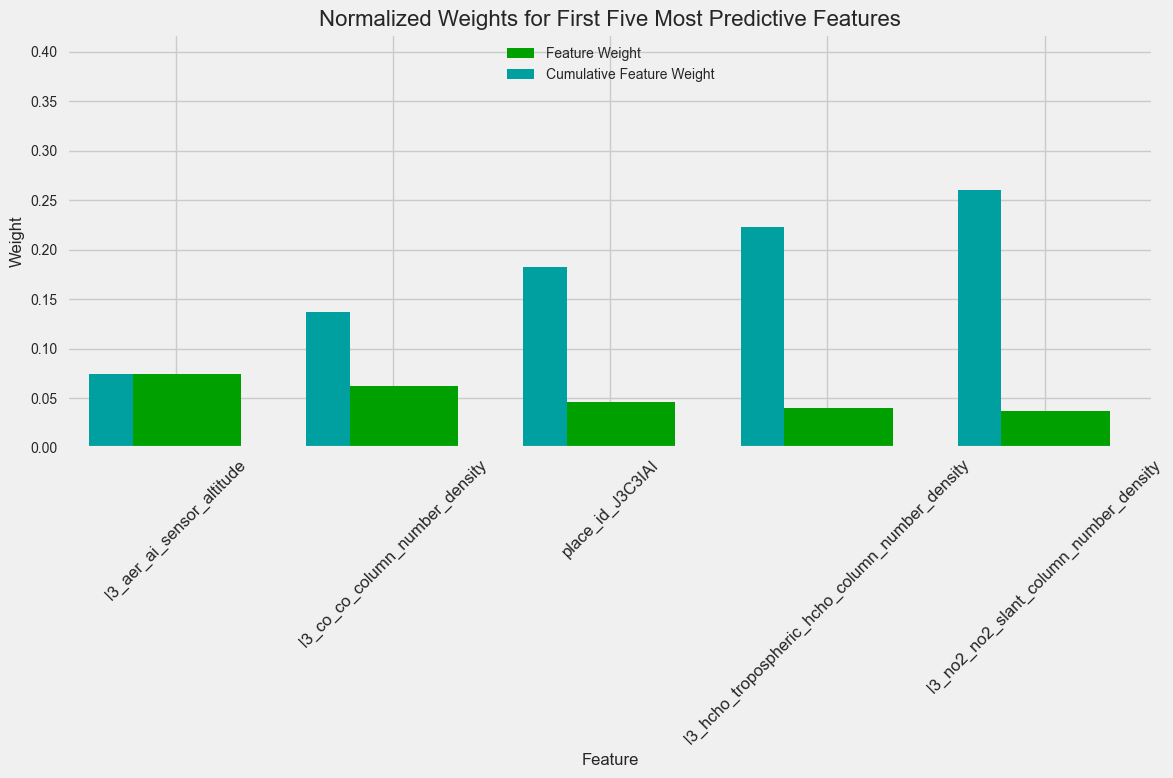

In [160]:
def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:10]]
    values = importances[indices][:10]

    # Creat the plot
    fig = plt.figure(figsize = (12,8))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(10), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(10) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(10), columns, rotation=45, fontsize=12)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    

    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()  

imp_features = extra_tree.feature_importances_


# Plot
feature_plot(imp_features, X_train, y_train)

In [169]:
X_train['l3_no2_sensor_altitude'].nunique()

18575

In [125]:
mse_extree = mean_squared_error(y_test, y_pred_extree)
print(f"MSE: {mse_extree:.3f}")
rmse_extree = np.sqrt(mse_extree)
print(f"RMSE: {rmse_ridge:.3f}")
r_2 = r2_score(y_test, y_pred_extree)
print(f"R^2: {r_2:.3f}")

p = X_train.shape[1]
n = len(y_test)  # Number of samples
adjusted_r2_extree = 1 - (1 - r_2) * (n - 1) / (n - p - 1)
print(f"Adjusted R^2: {adjusted_r2_extree:.3f}")

MSE: 0.145
RMSE: 0.420
R^2: 0.763
Adjusted R^2: 0.751


## KNN Regression

In [170]:
knn = KNeighborsRegressor(n_neighbors=21)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

In [171]:
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"MSE: {mse_knn:.3f}")
rmse_knn = np.sqrt(mse_knn)
print(f"RMSE: {rmse_knn:.3f}")
r_2 = r2_score(y_test, y_pred_knn)
print(f"R^2: {r_2:.3f}")

p = X_train.shape[1]
n = len(y_test)  # Number of samples
adjusted_r2_knn = 1 - (1 - r_2) * (n - 1) / (n - p - 1)
print(f"Adjusted R^2: {adjusted_r2_knn:.3f}")

MSE: 0.470
RMSE: 0.685
R^2: 0.230
Adjusted R^2: 0.190


## Gradient Boosting Regressor

In [172]:
gbrt = GradientBoostingRegressor(max_depth=20, n_estimators=500, learning_rate=1.0)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=1.0, max_depth=20, n_estimators=500)

In [173]:
y_pred_gbrt= gbrt.predict(X_test)

In [174]:
mse_gbrt = mean_squared_error(y_test, y_pred_gbrt)
print(f"MSE: {mse_gbrt:.3f}")
rmse_gbrt = np.sqrt(mse_gbrt)
print(f"RMSE: {rmse_gbrt:.3f}")
r_2 = r2_score(y_test, y_pred_gbrt)
print(f"R^2: {r_2:.3f}")

p = X_train.shape[1]
n = len(y_test)  # Number of samples
adjusted_r2_gbrt = 1 - (1 - r_2) * (n - 1) / (n - p - 1)
print(f"Adjusted R^2: {adjusted_r2_gbrt:.3f}")

MSE: 0.404
RMSE: 0.636
R^2: 0.338
Adjusted R^2: 0.304


## GridSearch - Tuning

In [200]:
# Define your regression estimators with specified random states
clf_rf = RandomForestRegressor(random_state=42)
clf_knn = KNeighborsRegressor()
clf_gb = GradientBoostingRegressor(random_state=42)
clf_et = ExtraTreesRegressor(random_state=42)

# Define hyperparameters for each estimator separately
param_grid_rf = {
    'classifier__n_estimators': [100, 300, 500],
    'classifier__max_depth': [10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

param_grid_knn = {
    'classifier__n_neighbors': [5, 10, 15, 20, 50],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2]
}

param_grid_gb = {
    'classifier__n_estimators': [100, 300, 500],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

param_grid_et = {
    'classifier__n_estimators': [100, 300, 500],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Create a dictionary that maps each estimator to its corresponding parameter grid
param_grids = {
    clf_rf: param_grid_rf,
    clf_knn: param_grid_knn,
    clf_gb: param_grid_gb,
    clf_et: param_grid_et
}

# Initialize and train the grid search model for each estimator
best_params = {}

for estimator, param_grid in param_grids.items():
    pipeline = Pipeline([('classifier', estimator)])
    gs = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, scoring='neg_root_mean_squared_error').fit(X_train, y_train)
    best_params[estimator.__class__.__name__] = gs.best_params_

# Best performing model and its corresponding hyperparameters for each estimator
for estimator_name, params in best_params.items():
    print(f"Best Hyperparameters for {estimator_name}: {params}")


Best Hyperparameters for RandomForestRegressor: {'classifier__max_depth': 30, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 500}
Best Hyperparameters for KNeighborsRegressor: {'classifier__n_neighbors': 20, 'classifier__p': 1, 'classifier__weights': 'distance'}
Best Hyperparameters for GradientBoostingRegressor: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 500}
Best Hyperparameters for ExtraTreesRegressor: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 500}
